In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pandas as pd 
import os, json, pickle


In [3]:
import sys 
sys.path.append('../src')

from spaceoracle.oracles import SpaceOracle
from spaceoracle.tools.network import DayThreeRegulatoryNetwork, MouseKidneyRegulatoryNetwork

%config InlineBackend.figure_format = 'retina'

co_grn = DayThreeRegulatoryNetwork()
adata = sc.read_h5ad('.cache/adata_train.h5ad')

2024-11-10 22:16:35.501811: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
from spaceoracle.plotting.layout import *
from spaceoracle.plotting.shift import *
from spaceoracle.plotting.randomize import *
from spaceoracle.plotting.transitions import * 

In [5]:
goi = 'Il2ra'

with open('.cache/lymph/beta_dict.pkl', 'rb') as f:
    beta_dict = pickle.load(f)

In [6]:
betas = beta_dict[goi].betas.values
betas.shape

(11567, 94)

In [36]:
from sklearn.cluster import KMeans

k = 20
kmeans = KMeans(n_clusters=k, random_state=1334).fit(betas)
labels = kmeans.labels_

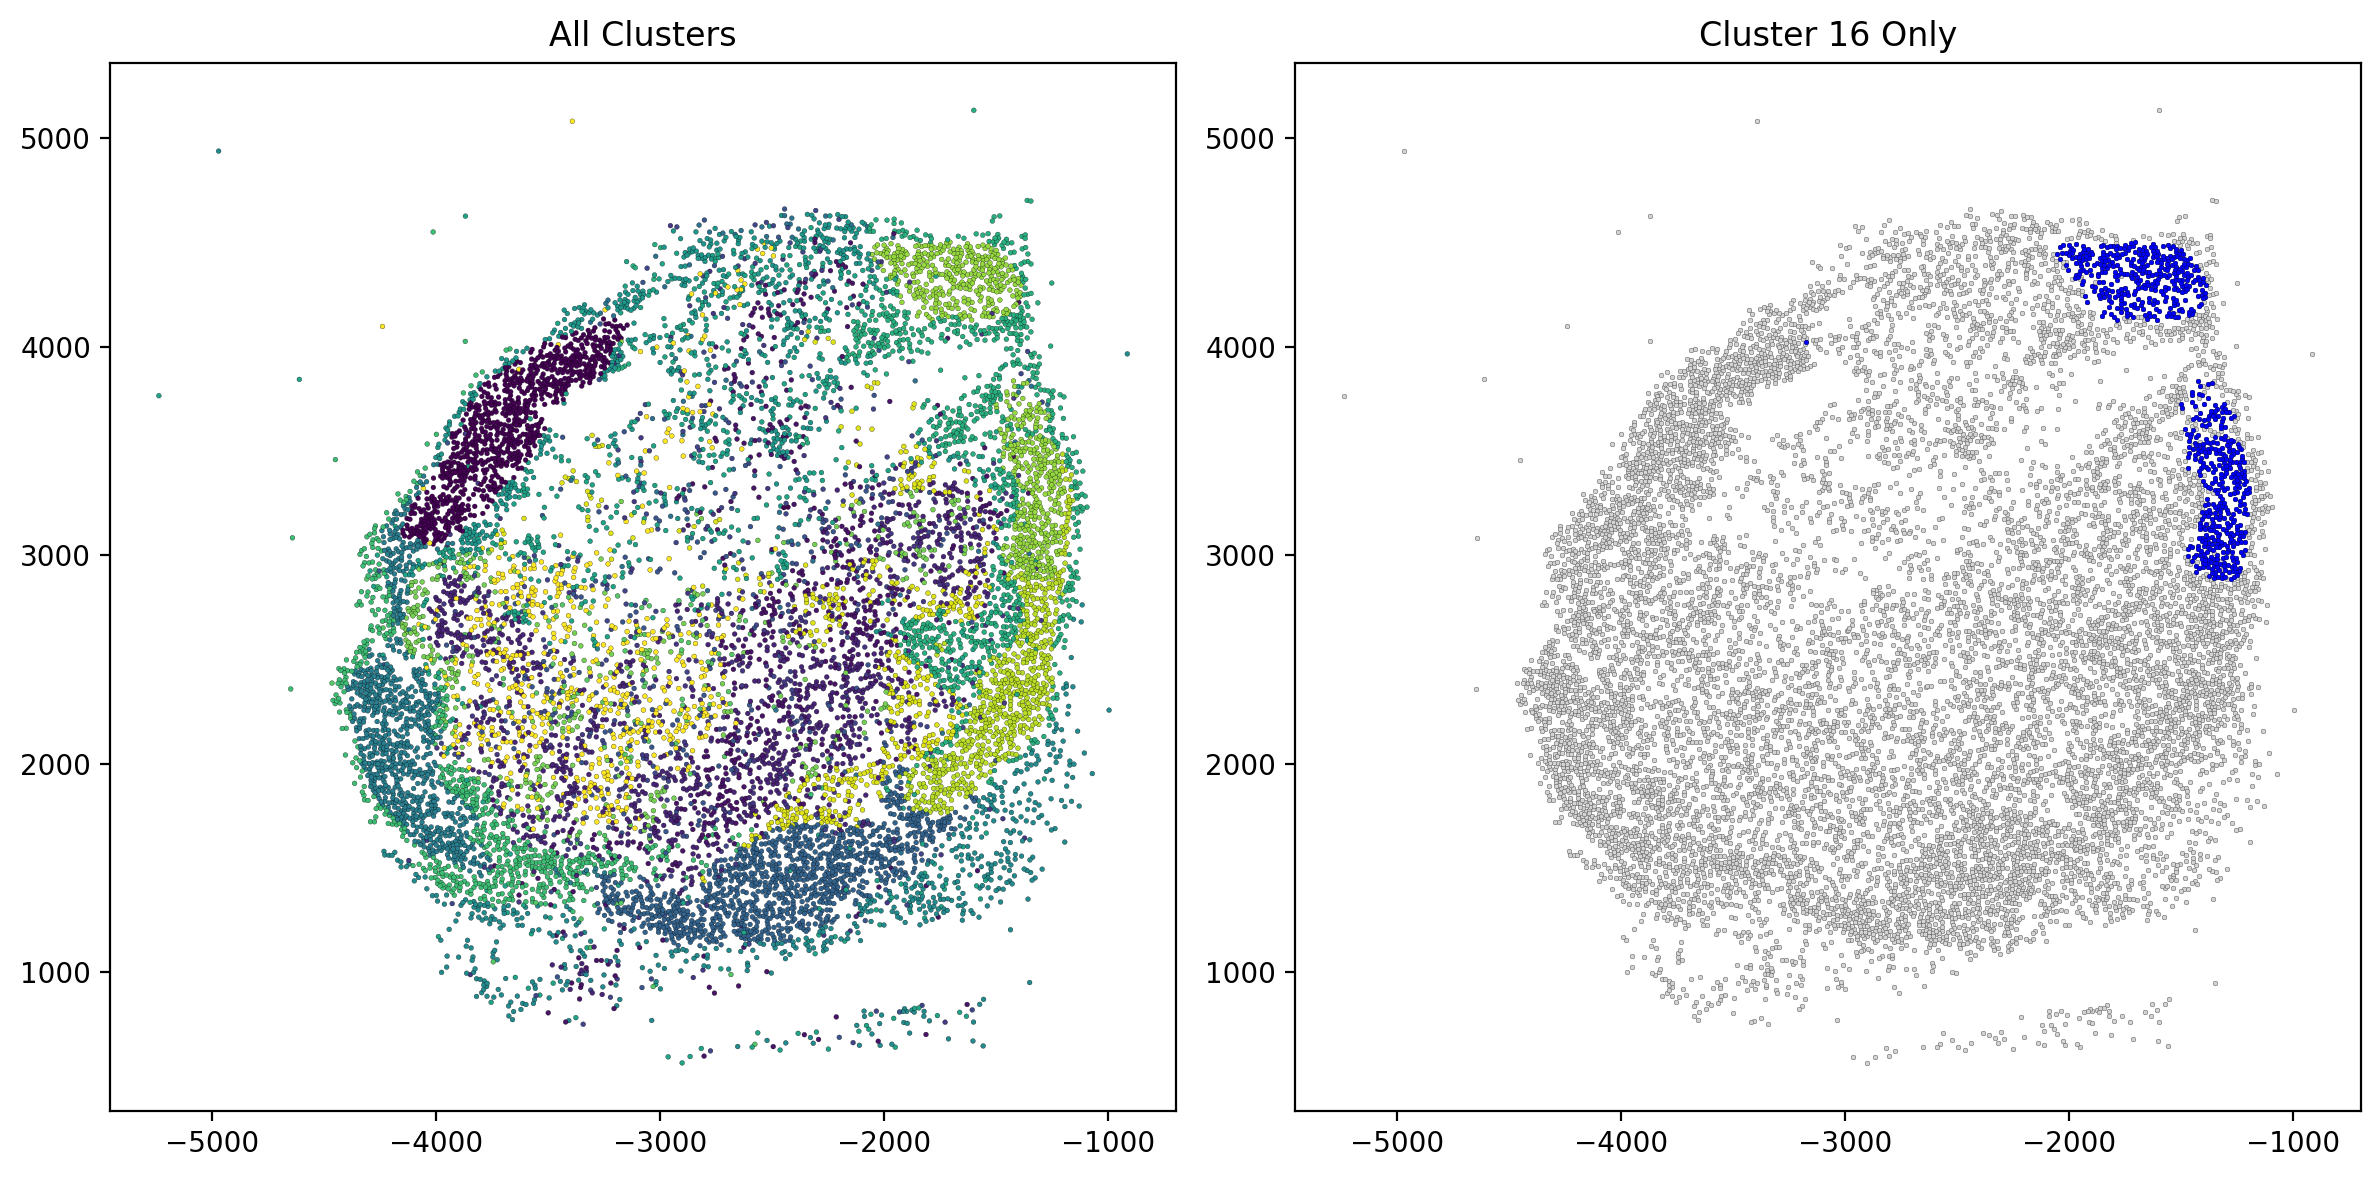

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(
    adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1],
    c=labels, s=3, edgecolors='black', linewidth=0.1
)
axes[0].set_title('All Clusters')

ko_cluster = 16
highlight = labels == ko_cluster
axes[1].scatter(
    adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1],
    c='lightgray', s=3, edgecolors='black', linewidth=0.1  
)
axes[1].scatter(
    adata.obsm['spatial'][highlight, 0], adata.obsm['spatial'][highlight, 1],
    c='blue', s=3, edgecolors='black', linewidth=0.1  
)
axes[1].set_title(f'Cluster {ko_cluster} Only')
plt.tight_layout()


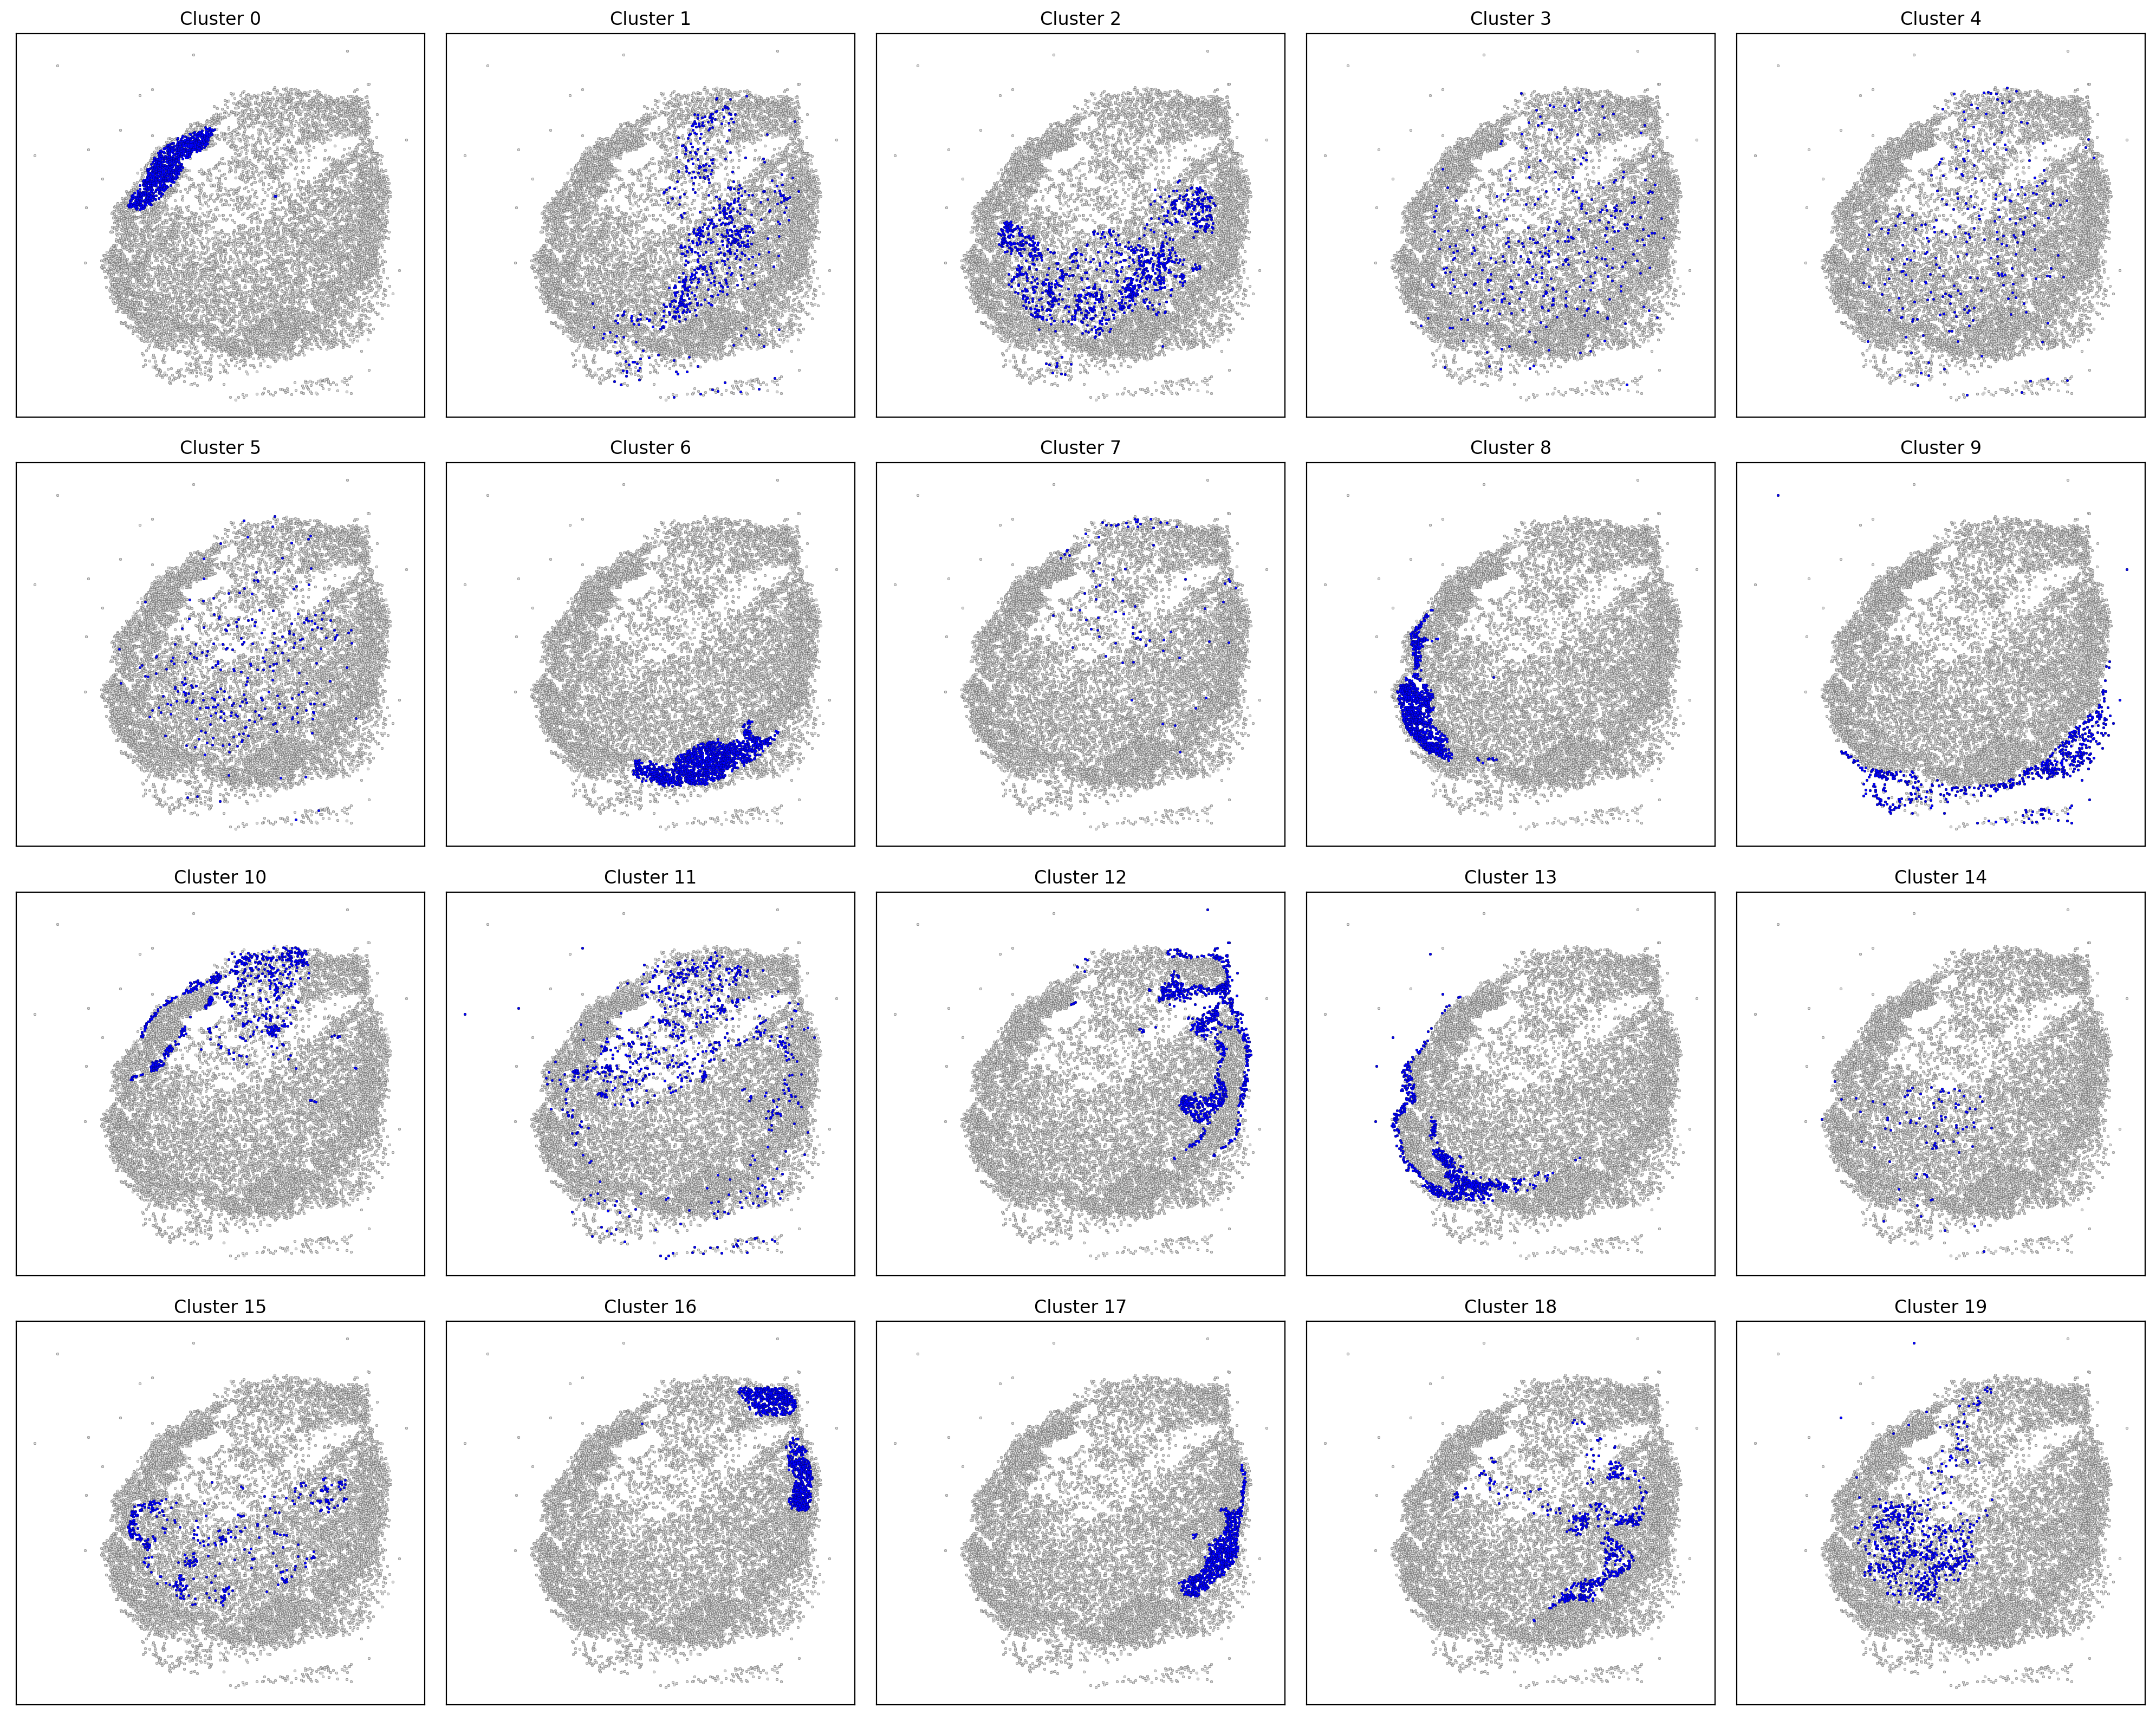

In [38]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 5, figsize=(20, 16))

axes = axes.ravel()

for i in range(k):
    cluster_mask = labels == i
    
    axes[i].scatter(
        adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1],
        c='lightgray', s=3, edgecolors='black', linewidth=0.1
    )
    
    axes[i].scatter(
        adata.obsm['spatial'][cluster_mask, 0], adata.obsm['spatial'][cluster_mask, 1],
        c='blue', s=3, edgecolors='black', linewidth=0.1
    )
    
    axes[i].set_title(f'Cluster {i}')
    axes[i].set_xticks([])  
    axes[i].set_yticks([])  

plt.tight_layout()
plt.show()


In [10]:
so = SpaceOracle(
    adata=adata,
    save_dir='/ix/djishnu/shared/djishnu_kor11/models',
    annot='rctd_cluster', 
    grn=co_grn
)

# so.beta_dict = beta_dict
# so.ligands = np.loadtxt('.cache/lymph/ligands.txt')

In [13]:
cell_kos = np.where(labels == ko_cluster)[0] 
print(len(cell_kos))

_ = so.perturb(target = goi, n_propagation=3, gene_expr=0, cells=cell_kos)

713


Running simulation 3/3: 100%|██████████| 11567/11567 [13:46<00:00, 14.00it/s]


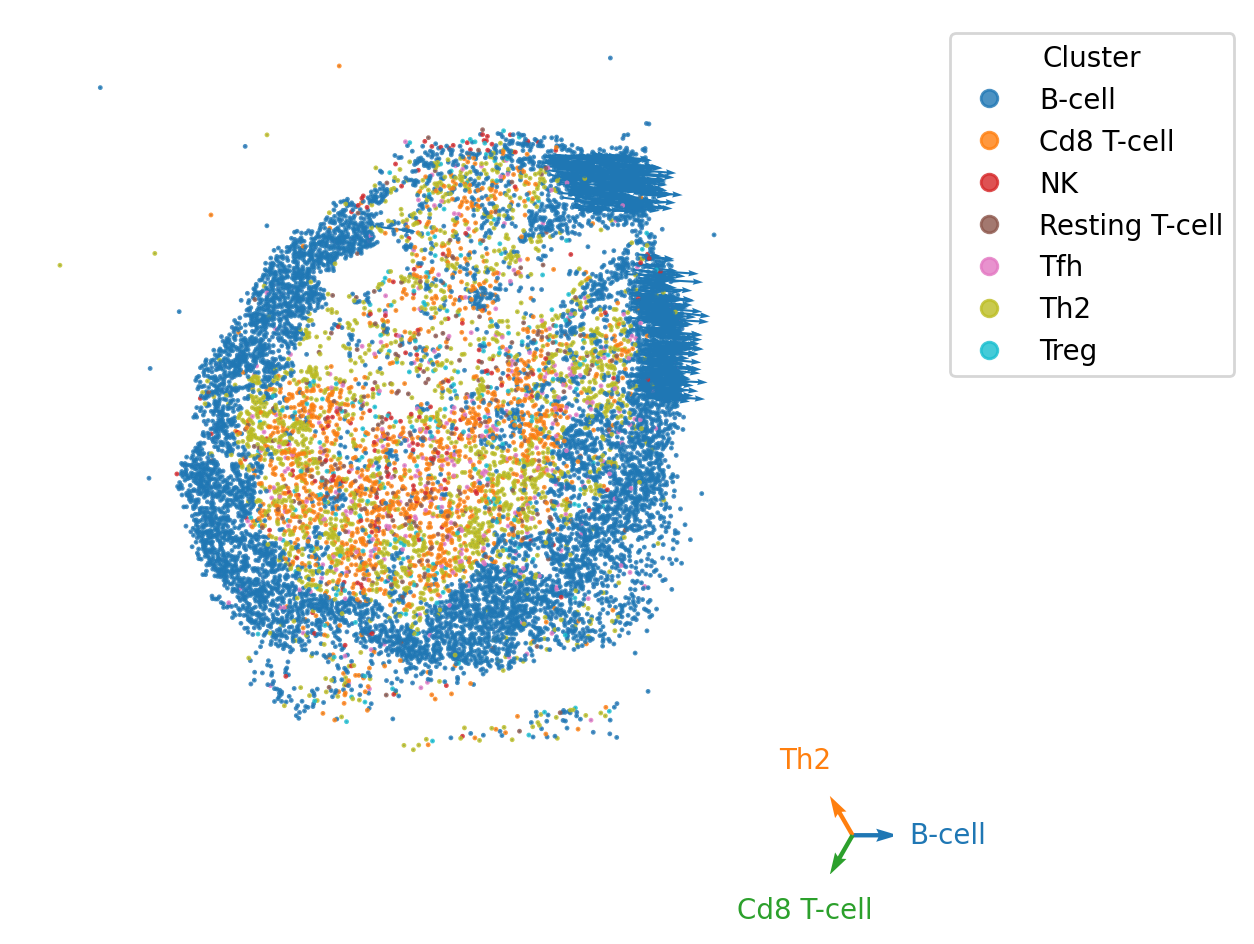

In [31]:
estimate_transitions(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['X_spatial'], 
    annot='rctd_celltypes', n_neighbors=200, vector_scale=30,
    visual_clusters=['B-cell', 'Th2', 'Cd8 T-cell'], 
    renormalize=False, n_jobs=1)

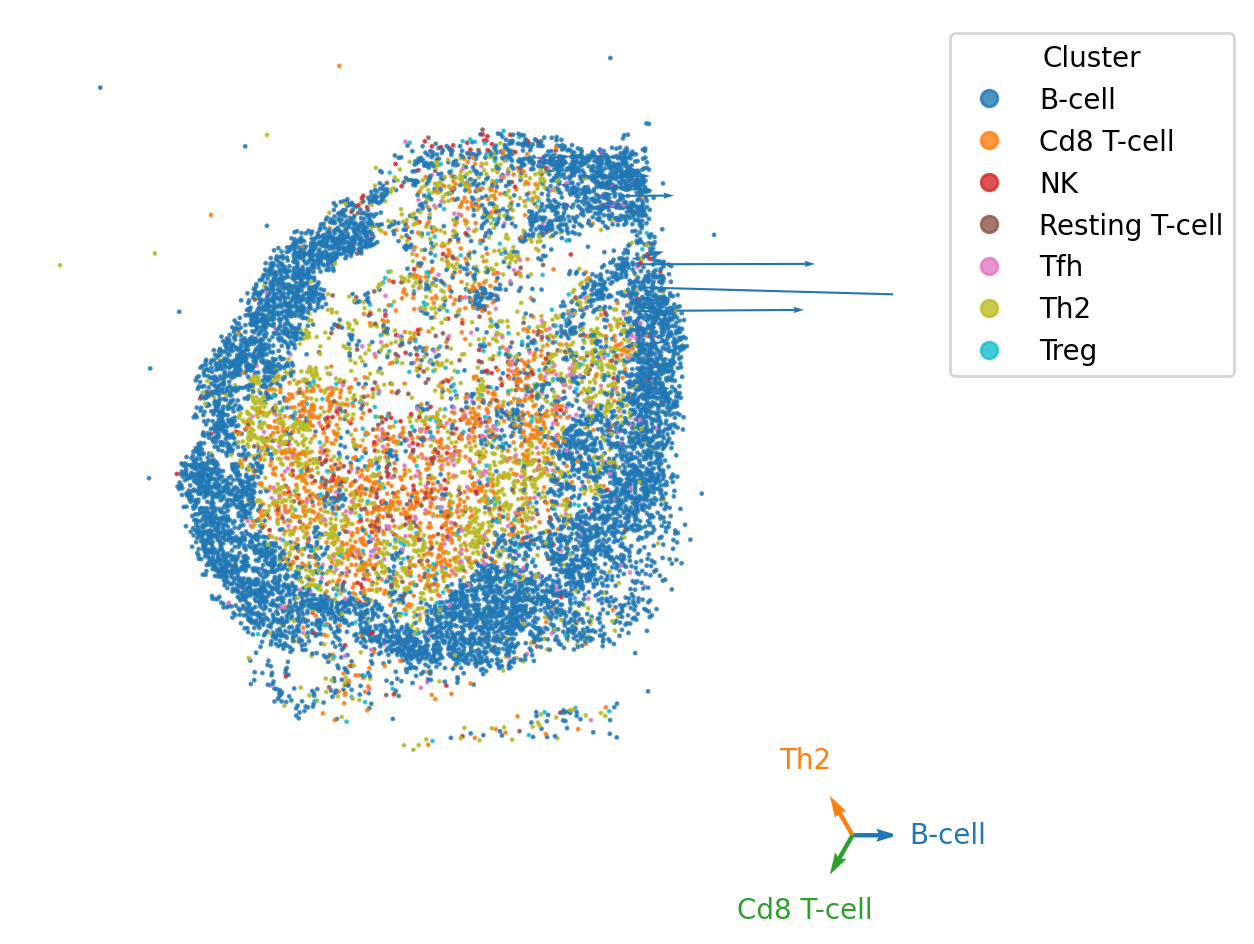

In [32]:
randomize_transitions(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['X_spatial'], 
    annot='rctd_celltypes', n_neighbors=200, vector_scale=30,
    visual_clusters=['B-cell', 'Th2', 'Cd8 T-cell'], 
    renormalize=False, n_jobs=1)

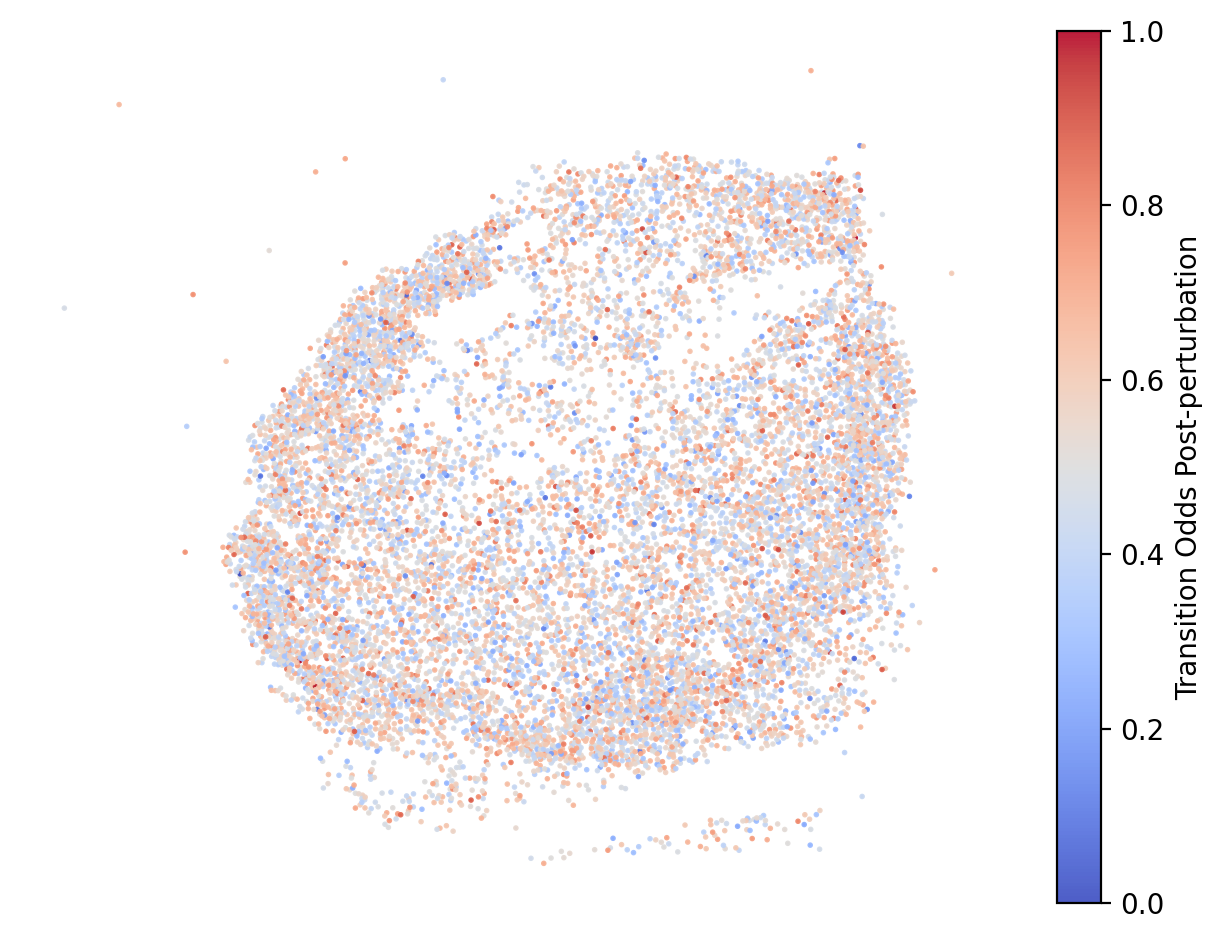

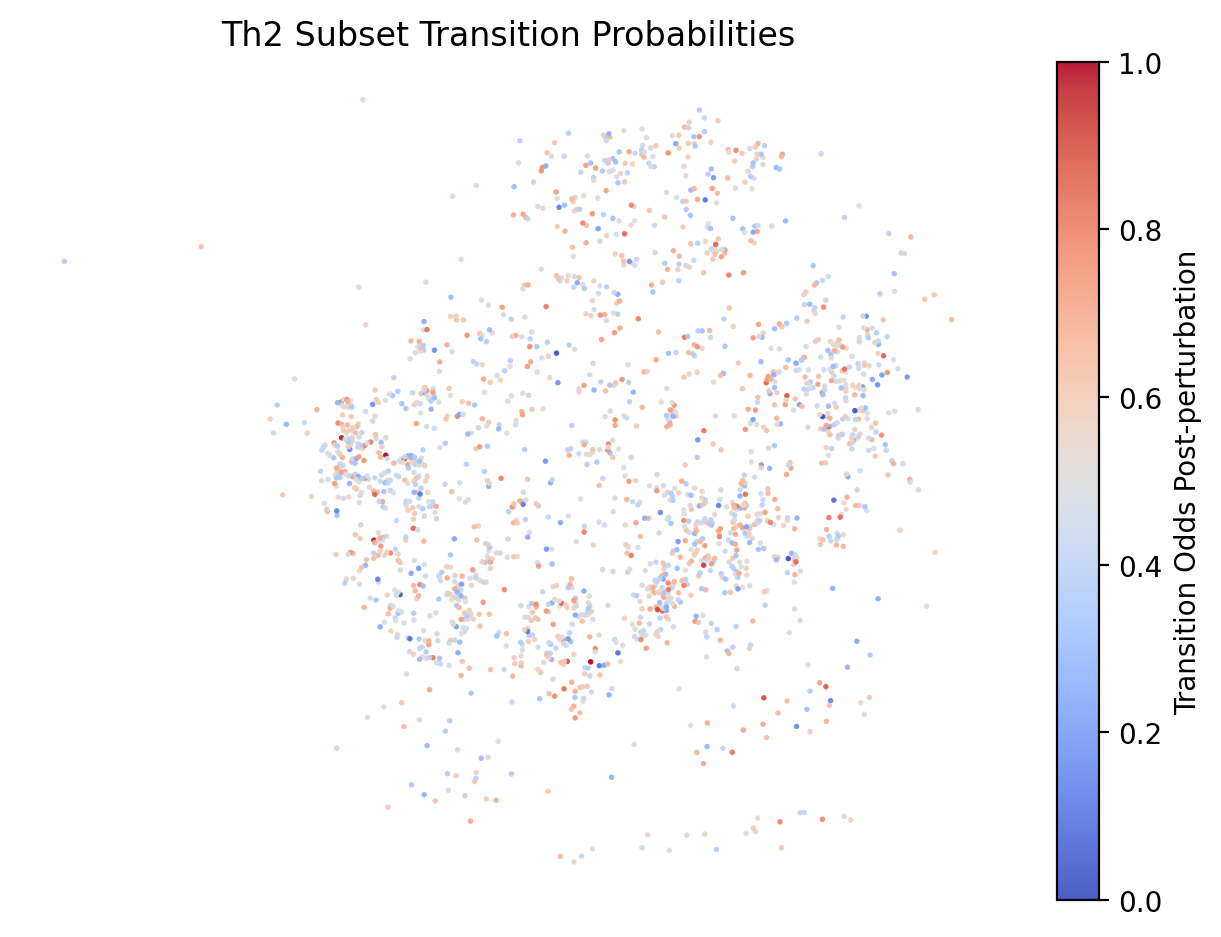

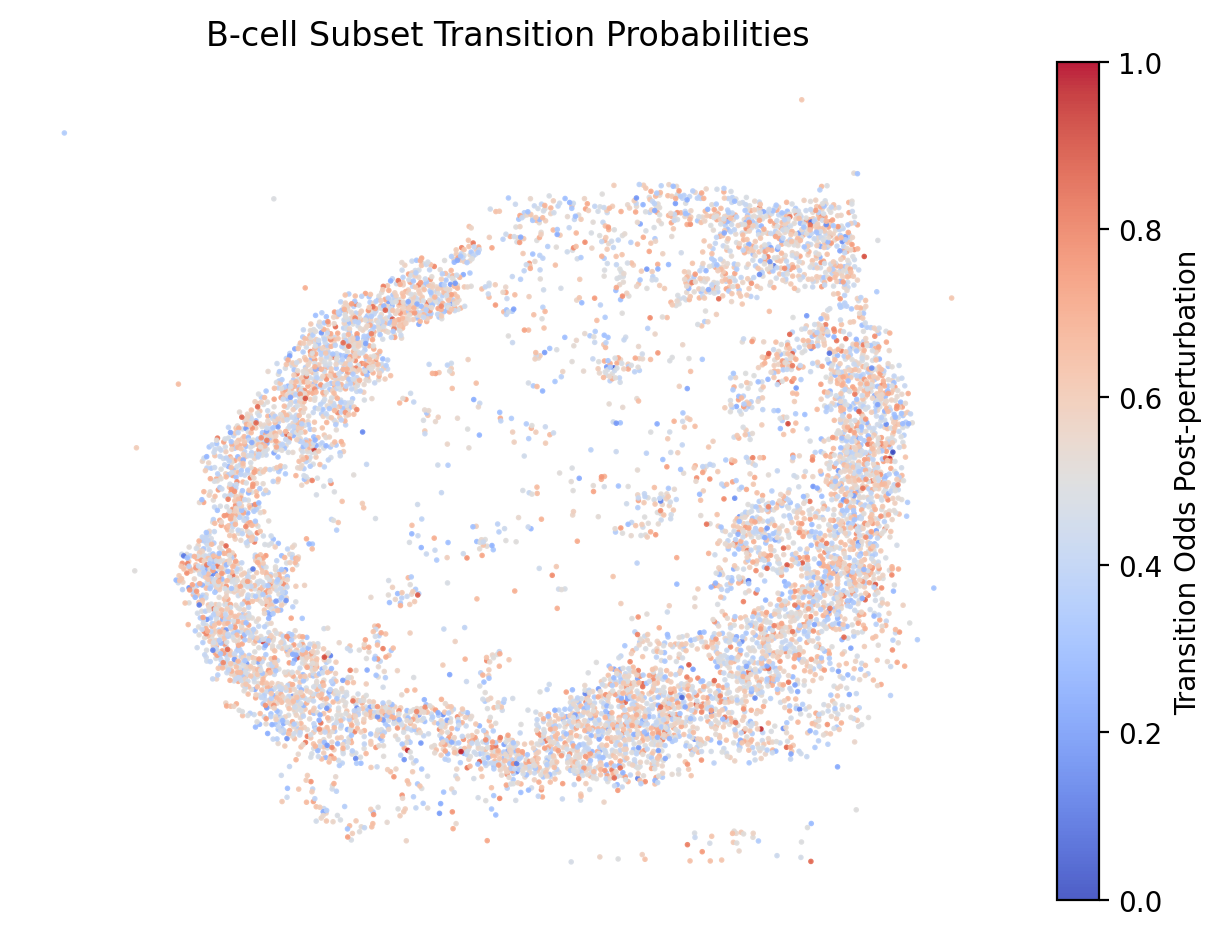

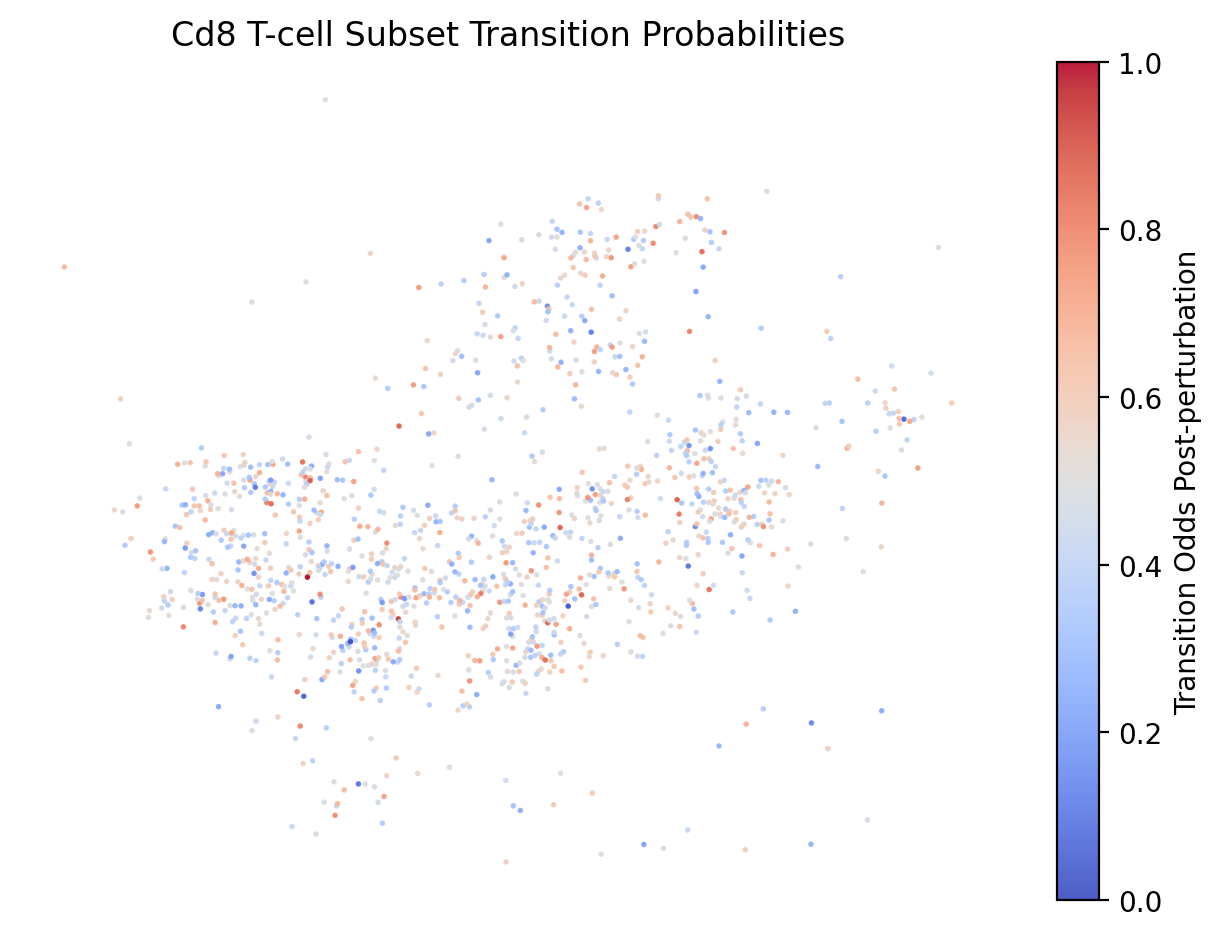

<Figure size 640x480 with 0 Axes>

In [33]:
view_probabilities(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['spatial'], n_jobs=1)

view_probabilities(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['spatial'], cluster='Th2', annot='rctd_celltypes', n_jobs=1)

view_probabilities(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['spatial'], cluster='B-cell', annot='rctd_celltypes', n_jobs=1)

view_probabilities(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['spatial'], cluster='Cd8 T-cell', annot='rctd_celltypes', n_jobs=1)

In [ ]:
ko_cluster = 12
cell_kos = np.where(labels == ko_cluster)[0] 
print(len(cell_kos))

_ = so.perturb(target = goi, n_propagation=1, gene_expr=0, cells=cell_kos)

estimate_transitions(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['X_spatial'], 
    annot='rctd_celltypes', n_neighbors=200, vector_scale=10,
    visual_clusters=['B-cell', 'Th2', 'Cd8 T-cell'], 
    renormalize=True, n_jobs=1)

randomize_transitions(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['X_spatial'], 
    annot='rctd_celltypes', n_neighbors=200, vector_scale=10,
    visual_clusters=['B-cell', 'Th2', 'Cd8 T-cell'], 
    renormalize=True, n_jobs=1)


867


Ligand interactions:   0%|          | 2/3125 [00:00<23:38,  2.20it/s]

In [ ]:
estimate_transitions_2D(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['X_spatial'], 
    annot='rctd_cluster', normalize=True, grid_scale=0.01, vector_scale=10, n_jobs=1)

randomize_transitions_2D(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['X_spatial'], 
    annot='rctd_cluster', normalize=True, grid_scale=0.01, vector_scale=10, n_jobs=1)

In [ ]:
view_probabilities(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['spatial'], n_jobs=1)

view_probabilities(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['spatial'], cluster='Th2', annot='rctd_celltypes', n_jobs=1)

view_probabilities(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['spatial'], cluster='B-cell', annot='rctd_celltypes', n_jobs=1)

view_probabilities(
    so.adata, so.adata.layers['delta_X'], so.adata.obsm['spatial'], cluster='Cd8 T-cell', annot='rctd_celltypes', n_jobs=1)